<a href="https://colab.research.google.com/github/inessa3/DMML2020_Tesla/blob/main/3_Additional_cleaning_of_training_data_%2BLR_with_TFIDF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/7/77/Logo_HEC_Lausanne.png' width="200">

# Explanation
This is the third notebook of our project. It represents our second iteration to improve our accuracy score. Here, we  tried to clean the data better.

**Data Cleaning**

We cleaned the training data only and made the subsequent predictions on unlabelled test data.

To clean the data better, we tried the following new methods:
* Remove HTML chunks in the tweets
* Clean the Data with PorterStemmer, accounting for some impurities that we found in the tweets.

**Predictions**

Subsequently, we tested if the prediction scores improved. For this, we kept using logistic regression as a classifier. We used the following classifiers:
* Best parameters without cross validation
* Best parameters with cross validation

**Results**

Unfortunately, our accuracy decreased with this data cleaning method and with both classifiers. Therefore, we are not going to submit it.


**Outlook**

In the next iterations, we will use TDIDF and then some other techniques such as knn and decision trees to see if our accuracy improves.
These subsequent iterations can be seen in the following notebook ("4 Improving LR with TFIDF+Other classifier + conclusion").


##Import Libraries


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
import seaborn as sns
sns.set_style("white")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


##Download Data

In [ ]:
#Training Data
df = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/training_data.csv")
df.head()

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1


In [ ]:
#Test Data
df_test_data = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/test_data.csv")
df_test_data.head()

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


#1.Cleaning the (training) dataset
To clean the dataset we are going to use  SpaCy

##1.Remove the duplicates

In [ ]:
df_duplicated_free=df.drop_duplicates(subset='text', keep='first')
df_duplicated_free

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


##2.Remove HTML chunks with re.sub

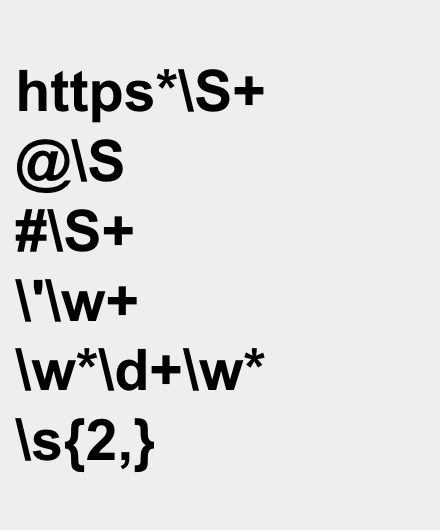

HTML chunks were quite common in these tweets. As they do not contain any information, we removed them.

In [ ]:
# Load English language model
sp = spacy.load('en_core_web_sm')

In [ ]:
def text_preproc(x):
  
  #x = x.encode('ascii', 'ignore').decode()
  # Remove URL
  x = re.sub(r'https*\S+', ' ', str(x))
  # Remove mentions
  x = re.sub(r'@\S+', ' ', x)
  # Remove Hashtags
  x = re.sub(r'#\S+', ' ', x)
  # Remove ticks and the next character
  x = re.sub(r'\'\w+', '', x)
  # Remove numbers
  x = re.sub(r'\w*\d+\w*', '', x)
  # Replace the over spaces
  x = re.sub(r'\s{2,}', ' ', x)
  #lower case letters
  x = x.lower()
  return x


In [ ]:
df_duplicated_free=df_duplicated_free.copy()
df_duplicated_free.loc["text"]=df_duplicated_free.text.apply(text_preproc)

In [ ]:
# instantiate 
from tqdm import tqdm, tqdm_notebook
tqdm.pandas(tqdm_notebook)

# replace map with progress_map
# where df is a pandas dataframe
df_duplicated_free['text'] = df_duplicated_free['text'].progress_map(text_preproc)

100%|██████████| 6388/6388 [00:00<00:00, 45050.60it/s]


In [ ]:
df_duplicated_free.to_csv('cleaned_data.csv')
!cp cleaned_data.csv "drive/My Drive/DM&ML/Colab Notebooks/Project"

We have saved the dataset to drive and now, we download the new dataset again. We are going to work on it more.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/cleaned_data.csv", error_bad_lines=False)
df

,id,keyword,location,text,target
0,3738.0,destroyed,USA,black eye : a space battle occurred at star in...,0.0
1,853.0,bioterror,NaN,fedex no longer to transport bioterror germs i...,0.0
2,10540.0,windstorm,"Palm Beach County, FL",reality training: train falls off elevated tra...,1.0
3,5988.0,hazardous,USA,grace: expect that large rocks trees mud unsta...,1.0
4,6328.0,hostage,Australia,new isis video: isis threatens to behead croat...,1.0
...,...,...,...,...,...
6382,4377.0,earthquake,ARGENTINA,m . - e of anchorage alaska: -- :: -- :: -: ...,1.0
6383,3408.0,derail,NaN,totally agree.she is and know what birth contr...,0.0
6384,9794.0,trapped,NaN,hollywood movie about trapped miners released ...,1.0
6385,10344.0,weapons,Beirut/Toronto,friendly reminder that the only country to eve...,1.0


##3.Clean the tweets with PorterStemmer

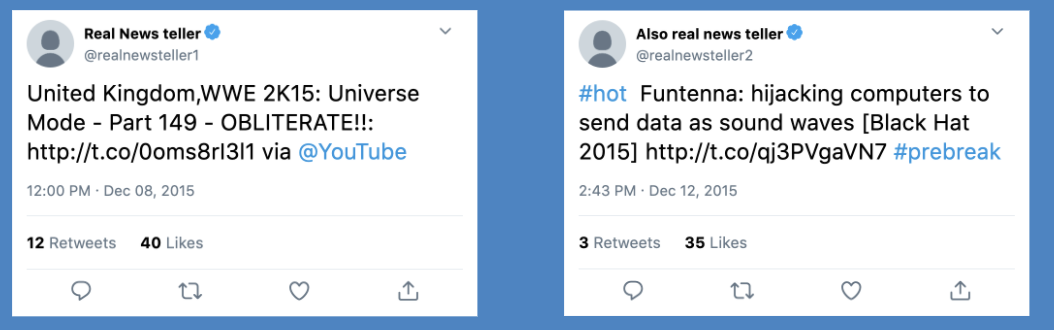

We found many parts in the code needed individual cleaning. One exampel is 2k15 and 2015 which both stand for the same thing. So we cleaned it.

In [ ]:
# Select variables
X = df.text
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train

2357              various issues fail to derail homes bid
5508    baltimore city : i- north at mp . (fort mchenr...
5092    i feel your pain. survivors will look back on ...
5931           ron &amp; fez - dave high school crush via
1537    || so.... i just watched the trailed for the d...
                              ...                        
2885    . felt remorse for missing pam drowned it with...
3941             that always good for a pretty explosion.
5166                   hour parade like people collapsed.
5907    christian attacked by muslims at the temple mo...
4568    catching up on gbbo and omg that girls cake th...
Name: text, Length: 5109, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def data_cleaner(tweet):
    
    # remove digits
    tweet= re.sub(r"\d+","", tweet)
    
    
    # remove punctuation
    tweet = re.sub(r"[^\w\s\d]","", tweet)

    # remove HTML
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # remove stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    # remove all the rest
    tweet = re.sub(r"'/#\w+\s*/'", "", tweet)
    tweet = re.sub(r"\x89Û_[\w\_]+", "", tweet)
    tweet = re.sub(r"\x89ÛÒ[\w\_]+", "", tweet)
    tweet = re.sub(r"\@[\w\_]+", "", tweet)
    tweet = re.sub(r"\åÊ[\w\_]+", "", tweet)
    tweet = re.sub(r"\åÈ[\w\_]+", "", tweet)
    tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    

    #\w will match alphanumeric characters and underscores
    #[^\w] will match anything that's not alphanumeric or underscore
    tweet = re.sub(r'[^\w]', ' ', tweet)  
    tweet= re.sub(r"youûªre", "you are", tweet)
    tweet = re.sub(r"û_", " ", tweet) 
    tweet = re.sub(r"û÷firstûª", "first", tweet) 
    tweet = re.sub(r"û÷secondûª", "second", tweet) 
    tweet = re.sub(r"reû_", " ", tweet) 
    tweet = re.sub(r'2k15', '2015 ', tweet)  
    tweet = re.sub(r"owenrbroadhurst", "owner broad hurst", tweet) 
    tweet = re.sub(r"histû_", "history", tweet) 
    tweet = re.sub(r"yrs", "years", tweet) 
    tweet = re.sub(r"beû_", " ", tweet) 
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"û_", "", tweet) 
    tweet = re.sub(r"[ ìñ ]", " ", tweet)  
    tweet = re.sub(r"^oo^", " ", tweet) 
    tweet = re.sub(r"-: hs tryout: :-", "", tweet) 
    tweet = re.sub(r"answerû_", "answer", tweet) 
    tweet = re.sub(r"tbh", "to be honest", tweet) 
    tweet = re.sub(r"swea", "swear", tweet) 
    tweet = re.sub(r"	rt ", "retweet", tweet)
    tweet = re.sub(r"yessum", "yes I am", tweet) 
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"nw ", "new", tweet) 
    tweet = re.sub(r" heûªs", "he is", tweet) 
    tweet = re.sub(r"ûïsippinûª", "spinning", tweet) 
    tweet = re.sub(r"yall", "you all", tweet) 
    tweet = re.sub(r"ppl", "people", tweet) 
    tweet = re.sub(r"sometimesi", "sometimes", tweet) 
    tweet = re.sub(r"chinaûªs", "China", tweet) 
    tweet = re.sub(r"todayûªs ", "today's", tweet) 
    tweet = re.sub(r"newû_", "new", tweet) 
    tweet = re.sub(r"theyûªd", "they", tweet) 
    tweet = re.sub(r"davidû_", "David", tweet) 
    tweet = re.sub(r"buildingsûówe", "buldings", tweet)
    tweet = re.sub(r"offensiveû_", "offensive", tweet) 
    tweet = re.sub(r"bloodûª", "blood", tweet) 
    tweet = re.sub(r"bc", "because", tweet) 
    tweet = re.sub(r"tabû_", "tablet", tweet) 
    tweet = re.sub(r"bagsûª", "bags", tweet) 
    tweet = re.sub(r"û÷body", "body", tweet)
    tweet = re.sub(r"byû_", "by", tweet) 
    tweet = re.sub(r"decisionû_", "decision", tweet) 
    tweet = re.sub(r"canûªt ", "can't", tweet) 
    tweet = re.sub(r"australiaûªs ", "Australia's", tweet) 
    tweet = re.sub(r"didn", "didn't", tweet) 
    tweet = re.sub(r"hiûótech", "high tech", tweet) 
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"hollyw...", "Hollywood", tweet)
    tweet = re.sub(r"rt", "", tweet)
    # Tokenize
    tweet = word_tokenize(tweet)
    
    # Stemming
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet]
    
    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
example = df["text"].sample()
example.values[0]

'people like you should be charged after the inevitable rioting for contributing to it with your lies'

In [ ]:
data_cleaner(example.values[0])

['peopl', 'like', 'charg', 'inevit', 'riot', 'contribut', 'lie']

In [ ]:
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1,1), (1,2), (1, 3), (2, 2), (2, 3), (3, 3)]
    min_df = [1]
    max_df = [1.0]
    analyzer=['word', 'char']
    
    # Create config instances
    for n in ngram_range:
        for i in min_df:
            for j in max_df:
              for a in analyzer:
                    cfg = [n, i, j, a]
                    models.append(cfg)
    return models
configs = configs()

In [ ]:
def evaluate(true, pred):
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")

#2.Predictions

##1.Logistic Regression without Cross-Validation:

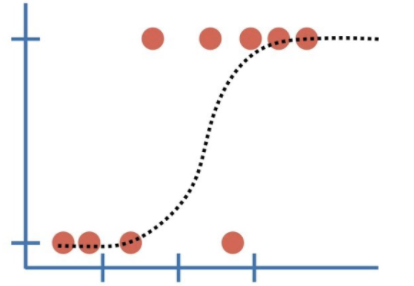

###1.Find the best parameters

In [ ]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=data_cleaner, 
                                   ngram_range=config[0],
                                   min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
    classifier = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=72)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])
    
 
    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("CONFIG: ", config)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

# Evaluation - training set
evaluate(y_train,pipe.predict(X_train))

CONFIG:  [(1, 1), 1, 1.0, 'word']
CONFUSION MATRIX:
[[663  99]
 [170 346]]
ACCURACY SCORE:
0.7895
-----------------------
CONFIG:  [(1, 1), 1, 1.0, 'char']
CONFUSION MATRIX:
[[612 150]
 [234 282]]
ACCURACY SCORE:
0.6995
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'word']
CONFUSION MATRIX:
[[669  93]
 [168 348]]
ACCURACY SCORE:
0.7958
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[624 138]
 [175 341]]
ACCURACY SCORE:
0.7551
-----------------------
CONFIG:  [(1, 3), 1, 1.0, 'word']
CONFUSION MATRIX:
[[671  91]
 [172 344]]
ACCURACY SCORE:
0.7942
-----------------------
CONFIG:  [(1, 3), 1, 1.0, 'char']
CONFUSION MATRIX:
[[648 114]
 [160 356]]
ACCURACY SCORE:
0.7856
-----------------------
CONFIG:  [(2, 2), 1, 1.0, 'word']
CONFUSION MATRIX:
[[724  38]
 [287 229]]
ACCURACY SCORE:
0.7457
-----------------------
CONFIG:  [(2, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[615 147]
 [175 341]]
ACCURACY SCORE:
0.7480
-----------------------
CONFIG:  [(2, 3), 1, 1.0

### 2.Prediction

In [ ]:
# Define vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=data_cleaner,ngram_range=(1, 2),
                                   min_df=1, max_df=1.0, analyzer= 'word') # we use the above defined tokenizer

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\b',
                                 tokenizer=<function data_cleaner at 0x7f9bfe4d6f28>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

In [ ]:
print('Train Accuracy: ', round(pipe.score(X_train, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test, y_test), 4))

Train Accuracy:  0.9029
Test Accuracy:  0.7958


In [ ]:
y_totest = df_test_data['text']
y_totest 

0       Crptotech tsunami and banks.\n http://t.co/KHz...
1       I'm that traumatised that I can't even spell p...
2       @foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3       Me watching Law &amp; Order (IB: @sauldale305)...
4                       Papi absolutely crushed that ball
                              ...                        
1137    @ItsQueenBaby I'm at work it's a bunch of ppl ...
1138    #?? #?? #??? #??? Suicide bomber kills 15 in S...
1139    Eruption of Indonesian volcano sparks transpor...
1140    Never let fear get in the way of achieving you...
1141    wowo--=== 12000 Nigerian refugees repatriated ...
Name: text, Length: 1142, dtype: object

In [ ]:
y_5 = df_test_data['text']
y_5 = pd.DataFrame()
y_5['target'] = pipe.predict(y_totest)
y_5

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1137,1.0
1138,1.0
1139,1.0
1140,0.0


In [ ]:
y_5.to_csv('y_5.csv')
!cp y_5.csv "drive/My Drive/DM&ML/Colab Notebooks/Project"

##2.Logistic Regression  with Cross-Validation:

###1.We find the best parameters

In [ ]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=data_cleaner, 
                                   ngram_range=config[0],
                                   min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
    classifier = LogisticRegressionCV(solver="lbfgs", max_iter=5000, random_state=72)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])
 
    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("CONFIG: ", config)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

CONFIG:  [(1, 1), 1, 1.0, 'word']
CONFUSION MATRIX:
[[648 114]
 [157 359]]
ACCURACY SCORE:
0.7879
-----------------------
CONFIG:  [(1, 1), 1, 1.0, 'char']
CONFUSION MATRIX:
[[617 145]
 [248 268]]
ACCURACY SCORE:
0.6925
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'word']
CONFUSION MATRIX:
[[646 116]
 [149 367]]
ACCURACY SCORE:
0.7926
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[624 138]
 [173 343]]
ACCURACY SCORE:
0.7567
-----------------------
CONFIG:  [(1, 3), 1, 1.0, 'word']
CONFUSION MATRIX:
[[621 141]
 [143 373]]
ACCURACY SCORE:
0.7778
-----------------------
CONFIG:  [(1, 3), 1, 1.0, 'char']
CONFUSION MATRIX:
[[644 118]
 [152 364]]
ACCURACY SCORE:
0.7887
-----------------------
CONFIG:  [(2, 2), 1, 1.0, 'word']
CONFUSION MATRIX:
[[664  98]
 [231 285]]
ACCURACY SCORE:
0.7426
-----------------------
CONFIG:  [(2, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[629 133]
 [190 326]]
ACCURACY SCORE:
0.7473
-----------------------
CONFIG:  [(2, 3), 1, 1.0

The best parameters are :
*   ngram range (1,1)
*   min_df = 1
*   max_df = 1.0
*   analyzer = 'word'

###2.Prediction

In [ ]:
# Define vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=data_cleaner,ngram_range=(1, 1),
                                   min_df=1, max_df=1.0, analyzer= 'word') # we use the above defined tokenizer

# Define classifier
classifier = LogisticRegressionCV(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function data_cleaner at 0x7f151d7c1ae8>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                      dual=Fal

In [ ]:
print('Train Accuracy: ', round(pipe.score(X_train, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test, y_test), 4))

Train Accuracy:  0.9196
Test Accuracy:  0.7879


#Conclusion
In this notebook we did additional cleaning by removing duplicates, removing HTML chunks and cleaning with PorterStemmer. We then made predictions without and with cross validation.

Unfortunately, we could see that accuracies we get with the 2 above defined classifiers  are much lower than the ones we get with logistic regression.

Therefore, we did not submit these results.

Here are all accuracies until iteration 2:

| Model      | Vectorizer | Test Accuracy  | Submission Accuracy  |
|----------------------|---------------------|---------|---------------|
| Logistic Regression without CV *(max_df=1.0, min_df=1, ngram_range=(1, 1))*  |TF-IDF| 0,8083 |  0,803   |
| Logistic Regression with CV *(idem, ngram_range=(1, 1))* |TF-IDF| 0,7895   |NaN  |
| Random Forest Classifier|TF-IDF| 0,7973 |NaN |       
| **Logistic Regression without CV (idem, ngram_range=(1, 2))**  |**TF-IDF** |**0,8099**  |**0,811**|
|----------------------|------------------|---------|---------------|
| LR additional cleaning without CV (*idem, ngram_range=(1, 2))* |TF-IDF | 0.7958 |NaN   |
| LR additional cleaning with CV *(idem, ngram_range=(1, 1))*  |TF-IDF   | 0.7879 |  NaN |


We have also noticed that since we made additional cleaning, our accuracies have been decreasing. Therefore, we could not manage to beat one of the first score we got.